<a href="https://colab.research.google.com/github/imsumit8/python_beginner/blob/main/Netflix_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Importing The Dataset

In [5]:
df=pd.read_csv('netflix.csv')

#Basic Analysis

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.shape

(8807, 12)

# Un Nesting the columns

In [10]:
#Putting the comma seperated strings into a list
df['listed_in']=df['listed_in'].str.split(',')

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [12]:
# Creating a copy of unnested column
df_unnested=df.explode('listed_in').reset_index(drop=True)

In [13]:
df_unnested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19323 non-null  object
 1   type          19323 non-null  object
 2   title         19323 non-null  object
 3   director      13439 non-null  object
 4   cast          17819 non-null  object
 5   country       17601 non-null  object
 6   date_added    19303 non-null  object
 7   release_year  19323 non-null  int64 
 8   rating        19317 non-null  object
 9   duration      19320 non-null  object
 10  listed_in     19323 non-null  object
 11  description   19323 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


## Handling Null Value of Unnested dataframe


In [14]:
(df_unnested.isna().sum()/len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        66.810492
cast            17.077325
country         19.552629
date_added       0.227092
release_year     0.000000
rating           0.068128
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [15]:
df_unnested['director']=df_unnested['director'].fillna('unknown director')
df_unnested['country']=df_unnested['country'].fillna('unknown country')
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [16]:
df_unnested.isna().sum()

show_id            0
type               0
title              0
director           0
cast            1504
country            0
date_added        20
release_year       0
rating             6
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
df_unnested.dropna(inplace=True,axis=0,subset=['date_added','rating'])

In [18]:
df_unnested.isna().sum()

show_id            0
type               0
title              0
director           0
cast            1504
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [19]:
df_unnested['cast']=df_unnested['cast'].fillna('unknown cast')

In [20]:
df_unnested.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [21]:
df_unnested.dropna(inplace=True,axis=0,subset=['duration'])

In [22]:
df_unnested.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#More Unnesting: The Cast column

In [23]:
#unnested the cast column
df_unnested['cast']=df_unnested['cast'].str.split(',')
df_cast=df_unnested.explode('cast').reset_index(drop=True)

In [24]:
df_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [25]:
df_cast.shape

(149284, 12)

## Null Value Treatment on the original Dataframe

In [26]:
## Deleting the showid
df.drop(columns=['show_id'],inplace=True)

In [27]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [28]:
#Percentage of null values present in each column
(df.isnull().sum()/len(df))*100

type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [29]:
df['director']=df['director'].fillna('unknown director')
df['country']=df['country'].fillna('unknown country')
df['rating']=df['rating'].fillna('unknown rating')
df['duration']=df['duration'].fillna('unknown duration')

df.isnull().sum()
df.dropna(subset=['date_added'],inplace=True)

In [30]:
df.isnull().sum()

type              0
title             0
director          0
cast            825
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [31]:
df.drop('cast',inplace=True,axis=1)

# Data Exploration

In [32]:
df['country'].value_counts()

United States                             2812
India                                      972
unknown country                            830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [33]:
df['rating'].value_counts()

TV-MA             3205
TV-14             2157
TV-PG              861
R                  799
PG-13              490
TV-Y7              333
TV-Y               306
PG                 287
TV-G               220
NR                  79
G                   41
TV-Y7-FV             6
unknown rating       4
NC-17                3
UR                   3
74 min               1
84 min               1
66 min               1
Name: rating, dtype: int64

In [34]:
df['release_year'].value_counts()

2018    1146
2017    1032
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [35]:
df['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

In [36]:
df['country'].value_counts().iloc[:10]

United States      2812
India               972
unknown country     830
United Kingdom      418
Japan               244
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Name: country, dtype: int64

In [37]:
#Filtering out the rows containing  unknown director from dataframe
df[df['director']!='unknown director']['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [38]:
df.isna().sum()

type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [39]:
#Filtering out the unknown country from dataframe
df_cleaned=df[df['country']!='unknown country']

In [40]:
top_10_countries=df_cleaned['country'].value_counts().iloc[:10]
top_10_countries

United States     2812
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

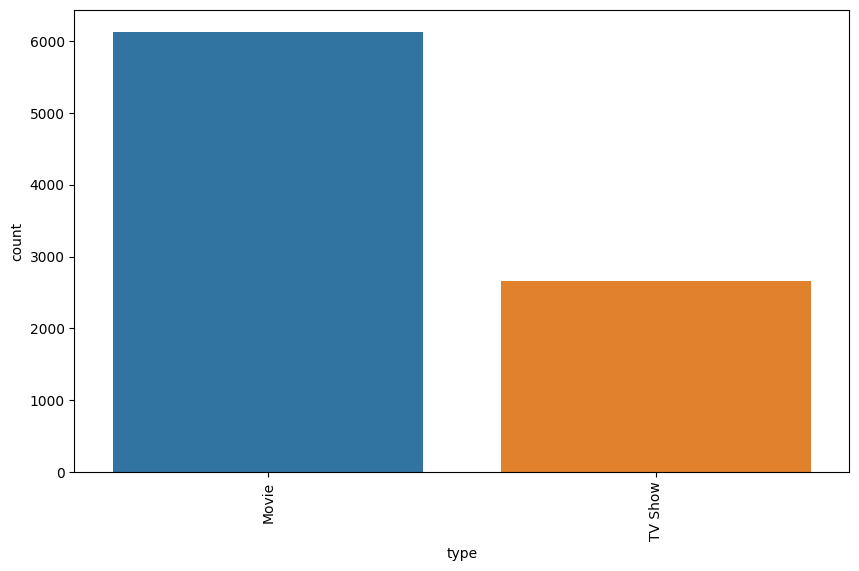

In [41]:
# Count of Tv vs Movie shows
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='type')
plt.xticks(rotation=90)
plt.show()

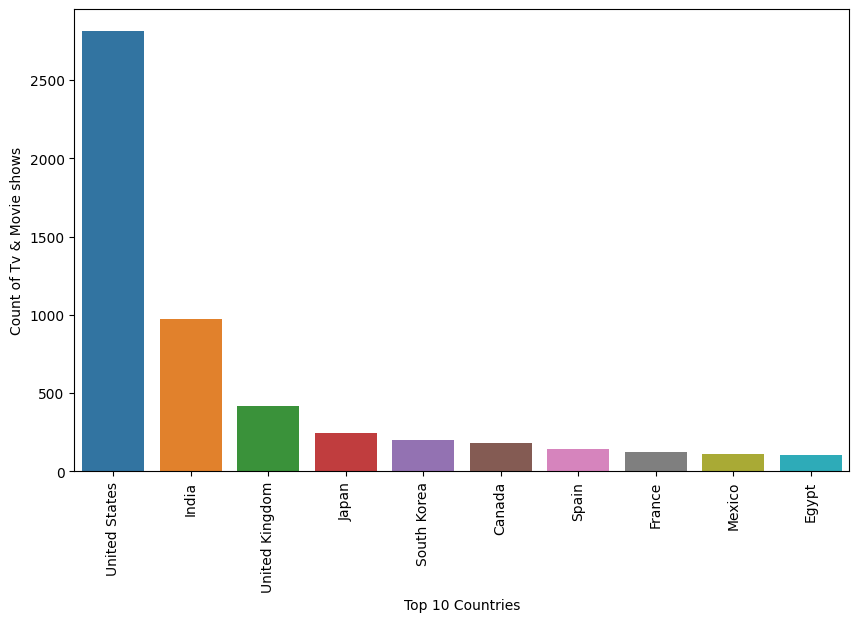

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

In [43]:
top_5_rating=df['rating'].value_counts().iloc[:5]

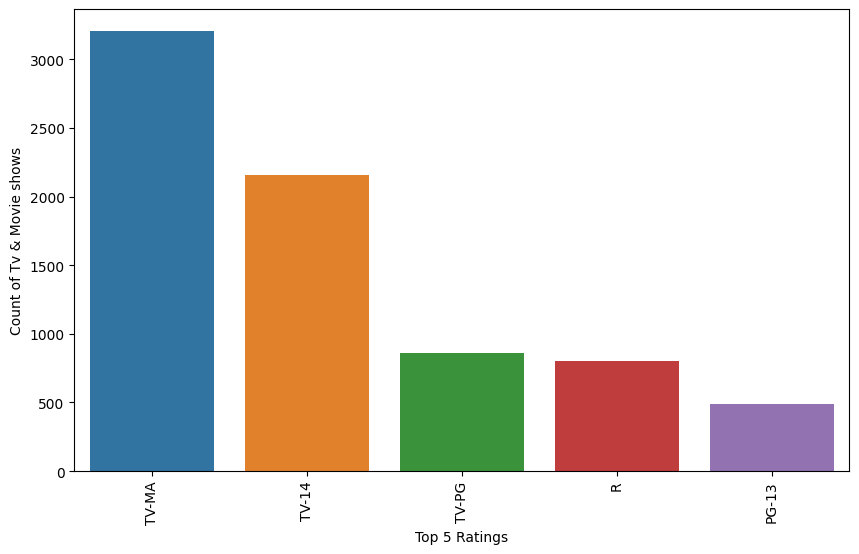

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['rating'].isin(top_5_rating.index)],x='rating',order=top_5_rating.index)
plt.xticks(rotation=90)
plt.xlabel('Top 5 Ratings')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

In [45]:
top_10_directors=df[df['director']!='unknown director']['director'].value_counts().sort_values(ascending=False).iloc[:10]

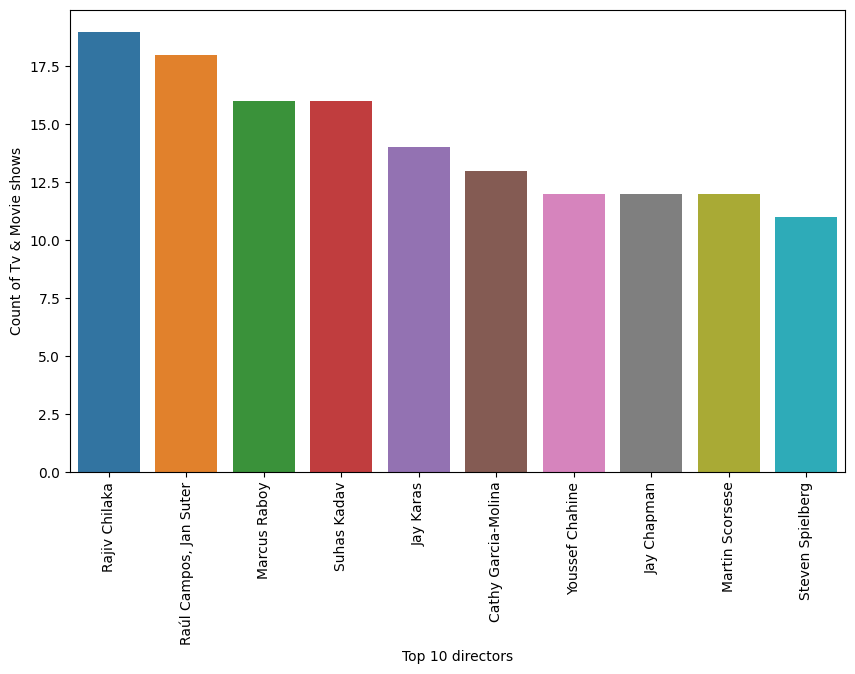

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['director'].isin(top_10_directors.index)],x='director',order=top_10_directors.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 directors')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

In [47]:
top_10_year=df['release_year'].value_counts().sort_values(ascending=False).iloc[:10]
top_10_year

2018    1146
2017    1032
2019    1030
2020     953
2016     901
2021     592
2015     558
2014     352
2013     287
2012     236
Name: release_year, dtype: int64

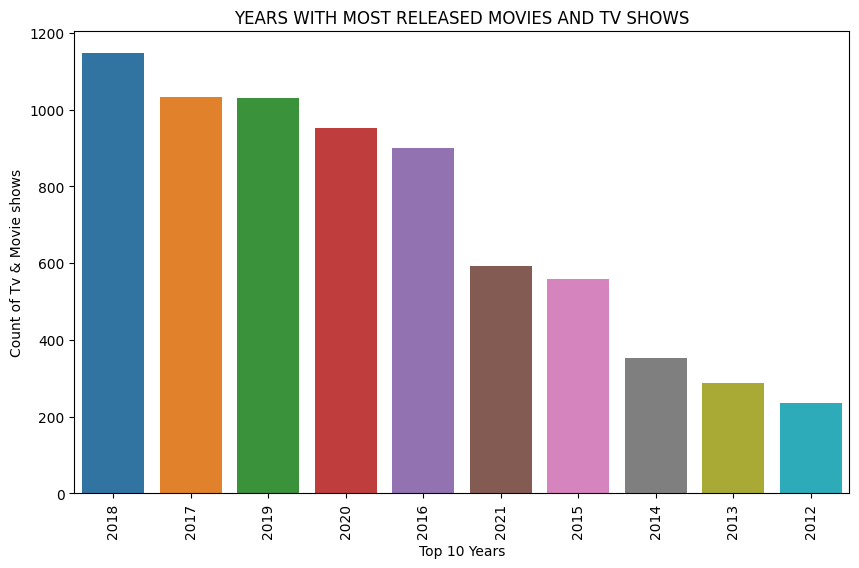

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['release_year'].isin(top_10_year.index)],x='release_year',order=top_10_year.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Years')
plt.ylabel('Count of Tv & Movie shows')
plt.title('YEARS WITH MOST RELEASED MOVIES AND TV SHOWS')
plt.show()

# Comparison of Tv shows vs. Movies

In [49]:
top_10_country_movies=df_cleaned[df_cleaned['type']=='Movie'].groupby('country').aggregate({'title':'count'}).reset_index().sort_values(by='title',ascending=False).rename(columns={'title':'Count of Movies'}).iloc[:10]
top_10_country_movies

,country,Count of Movies
525,United States,2058
218,India,893
440,United Kingdom,206
50,Canada,122
384,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
428,Turkey,76
278,Japan,76


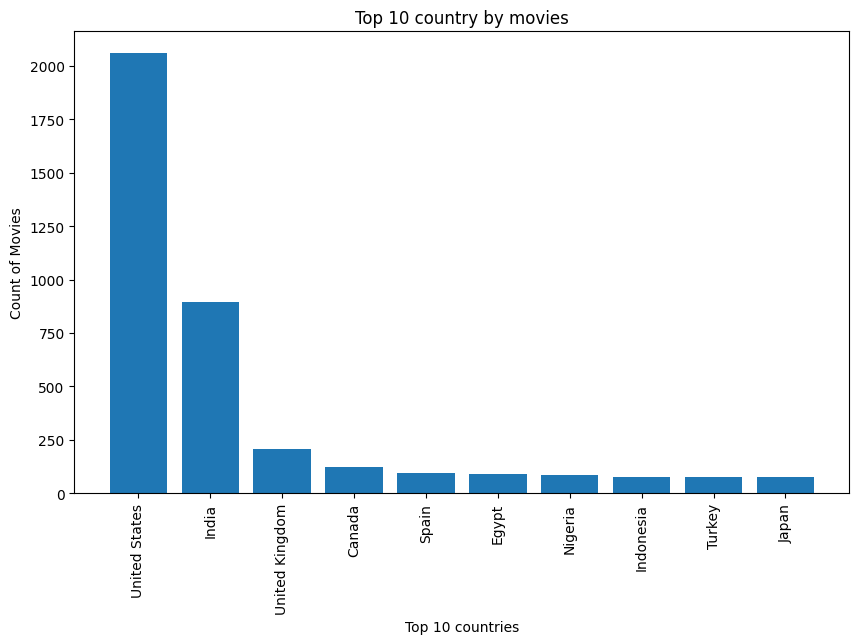

In [50]:
plt.figure(figsize=(10,6))
plt.bar(x=top_10_country_movies['country'],height=top_10_country_movies['Count of Movies'])
plt.xticks(rotation=90)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Movies')
plt.title('Top 10 country by movies')
plt.show()

In [51]:
top_10_country_Tv_show=df_cleaned[df_cleaned['type']=='TV Show'].groupby('country')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_country_Tv_show

country
United States     754
United Kingdom    212
Japan             168
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          47
Name: title, dtype: int64

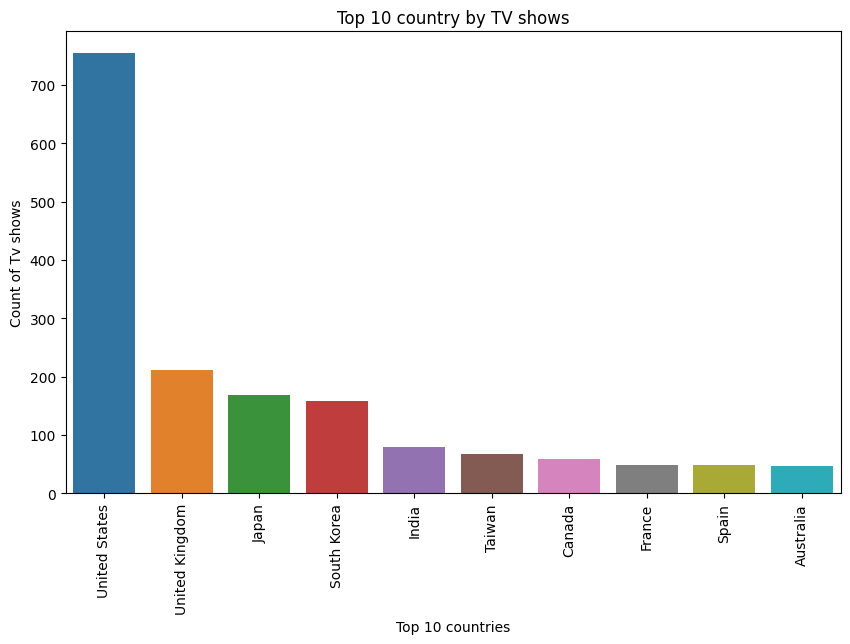

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_country_Tv_show.index,y=top_10_country_Tv_show.values,order=top_10_country_Tv_show.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Tv shows')
plt.title('Top 10 country by TV shows')
plt.show()

# TOP 10 COUNTRIES: Movies vs TV Shows

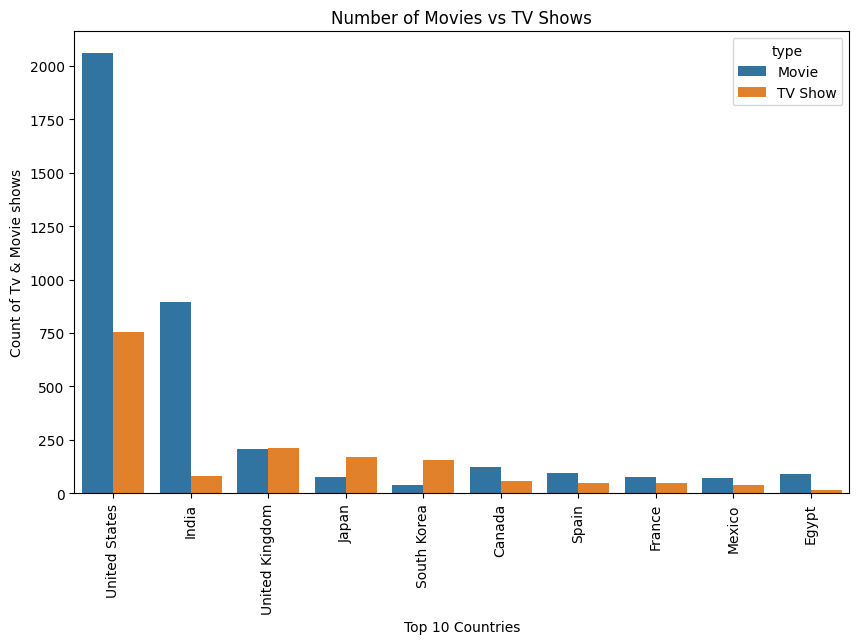

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.title('Number of Movies vs TV Shows')
plt.show()

## Best week to launch a TV show?

In [54]:
df['date_added']=pd.to_datetime(df['date_added'])

In [55]:
df['week_added']=df['date_added'].dt.weekofyear

<ipython-input-55-b823a350c8ba>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_added']=df['date_added'].dt.weekofyear


In [56]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,week_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",38
1,TV Show,Blood & Water,unknown director,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",38
2,TV Show,Ganglands,Julien Leclercq,unknown country,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,38
3,TV Show,Jailbirds New Orleans,unknown director,unknown country,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",38
4,TV Show,Kota Factory,unknown director,India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,38


In [57]:
top_10_weeks_TV_show=df[df['type']=='TV Show'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_weeks_TV_show)

week_added
27    86
31    83
13    76
44    75
24    75
35    74
5     73
26    73
40    72
50    70
Name: title, dtype: int64


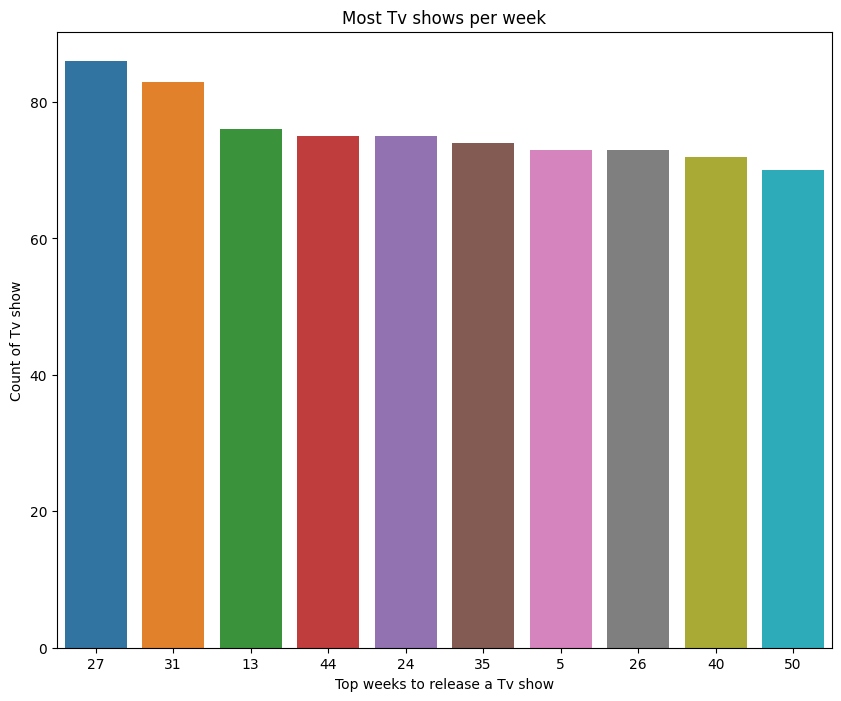

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_weeks_TV_show.index,y=top_10_weeks_TV_show.values,order=top_10_weeks_TV_show.index)
plt.xlabel('Top weeks to release a Tv show')
plt.ylabel('Count of Tv show')
plt.title('Most Tv shows per week')
plt.show()

# Best week to launch a Movie?

In [59]:
top_10_weeks_Movies=df[df['type']=='Movie'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_weeks_Movies)

week_added
1     316
44    243
40    215
9     207
26    195
35    189
31    185
13    174
18    173
27    154
Name: title, dtype: int64


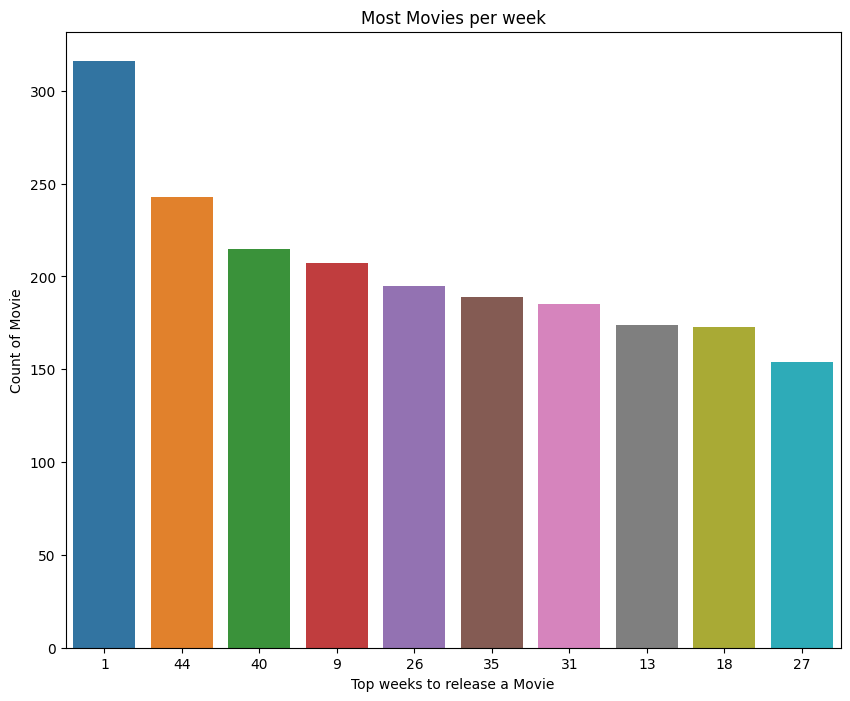

In [60]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_weeks_Movies.index,y=top_10_weeks_Movies.values,order=top_10_weeks_Movies.index)
plt.xlabel('Top weeks to release a Movie')
plt.ylabel('Count of Movie')
plt.title('Most Movies per week')
plt.show()

#Best month to launch a Movie?

In [61]:
df['month_added']=df['date_added'].dt.month_name()
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",38,September
1,TV Show,Blood & Water,unknown director,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",38,September
2,TV Show,Ganglands,Julien Leclercq,unknown country,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,38,September
3,TV Show,Jailbirds New Orleans,unknown director,unknown country,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",38,September
4,TV Show,Kota Factory,unknown director,India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,38,September


In [62]:
top_5_months_movies=df[df['type']=='Movie'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_movies)

month_added
July        565
April       550
December    547
January     546
October     545
Name: title, dtype: int64


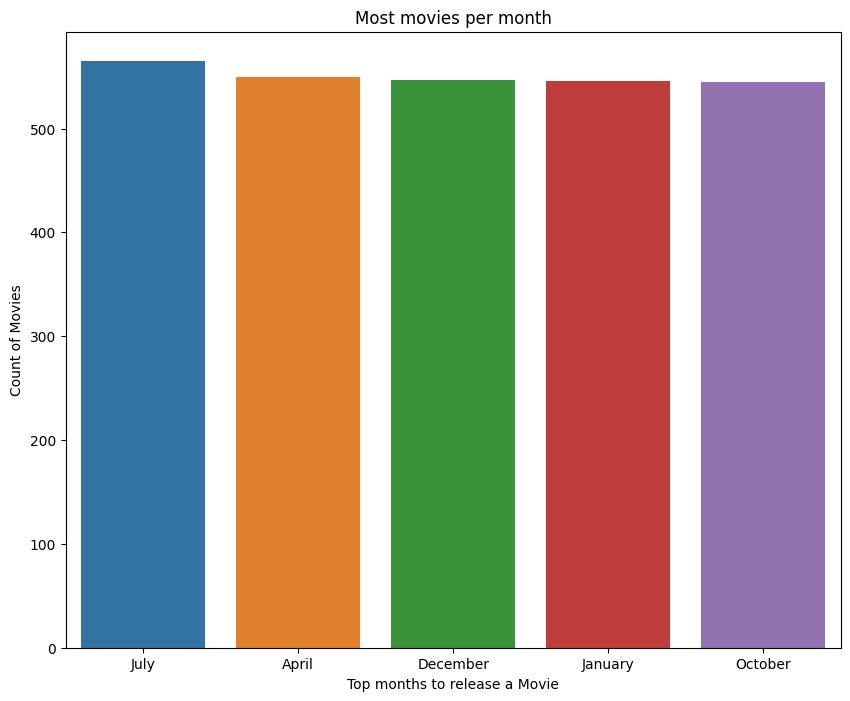

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_5_months_movies.index,y=top_5_months_movies.values,order=top_5_months_movies.index)
plt.xlabel('Top months to release a Movie')
plt.ylabel('Count of Movies')
plt.title('Most movies per month')
plt.show()

#Best month to launch a TV Show?


In [64]:
top_5_months_Tv_shows=df[df['type']=='TV Show'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_Tv_shows)

month_added
December     266
July         262
September    251
August       236
June         236
Name: title, dtype: int64


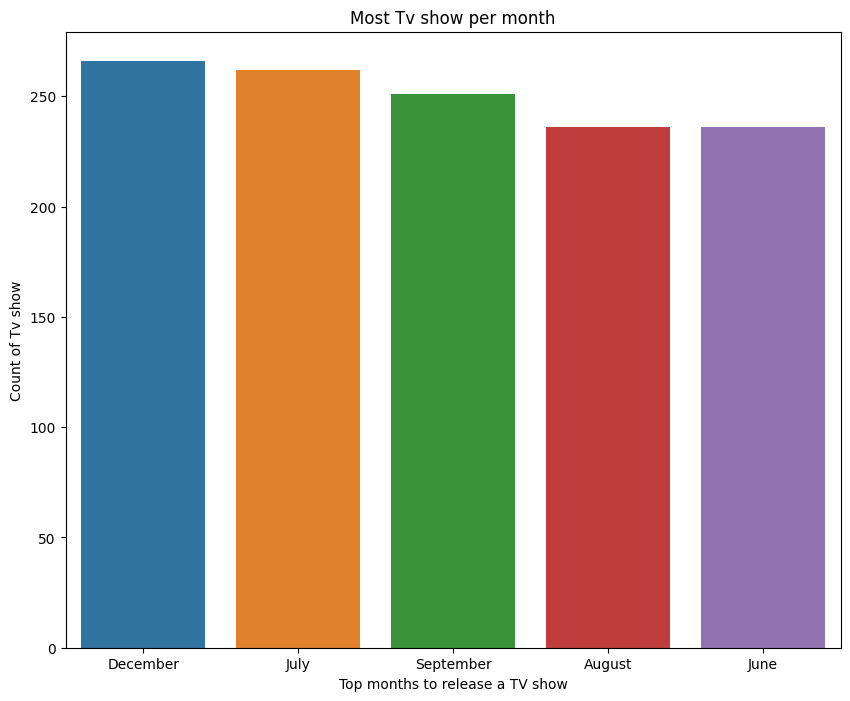

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_5_months_Tv_shows.index,y=top_5_months_Tv_shows.values,order=top_5_months_Tv_shows.index)
plt.xlabel('Top months to release a TV show')
plt.ylabel('Count of Tv show')
plt.title('Most Tv show per month')
plt.show()

# Analysis of actors/directors of different types of shows/movies

## Top 10 actors who have appeared in most movies

In [66]:
top_10_actor_movie=df_cast[(df_cast['type']=='Movie')&(df_cast['cast']!='unknown cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_actor_movie

cast
 Anupam Kher         106
Shah Rukh Khan        74
 Paresh Rawal         70
 Om Puri              69
 Boman Irani          68
Akshay Kumar          67
 Naseeruddin Shah     60
 Kareena Kapoor       55
Amitabh Bachchan      55
 Gulshan Grover       50
Name: title, dtype: int64

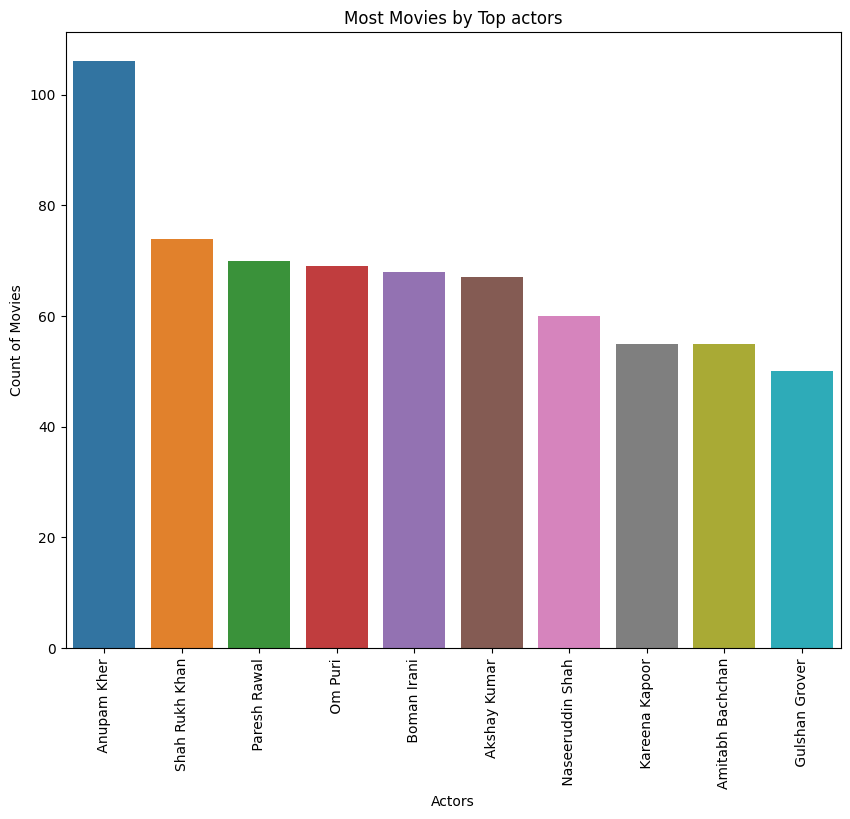

In [67]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_actor_movie.index,y=top_10_actor_movie.values,order=top_10_actor_movie.index)
plt.xlabel('Actors')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Top actors')
plt.xticks(rotation=90)
plt.show()

## Top 10 actors who have appeared in most TV SHOWS

In [68]:
top_10_actor_Tv_show=df_cast[(df_cast['type']=='TV Show')&(df_cast['cast']!='unknown cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_actor_Tv_show

cast
 Takahiro Sakurai     53
David Attenborough    41
 Yuki Kaji            40
 Ai Kayano            39
 Junichi Suwabe       38
 Daisuke Ono          31
 Yuichi Nakamura      31
 Takehito Koyasu      30
 Yoshimasa Hosoya     29
 Mamoru Miyano        28
Name: title, dtype: int64

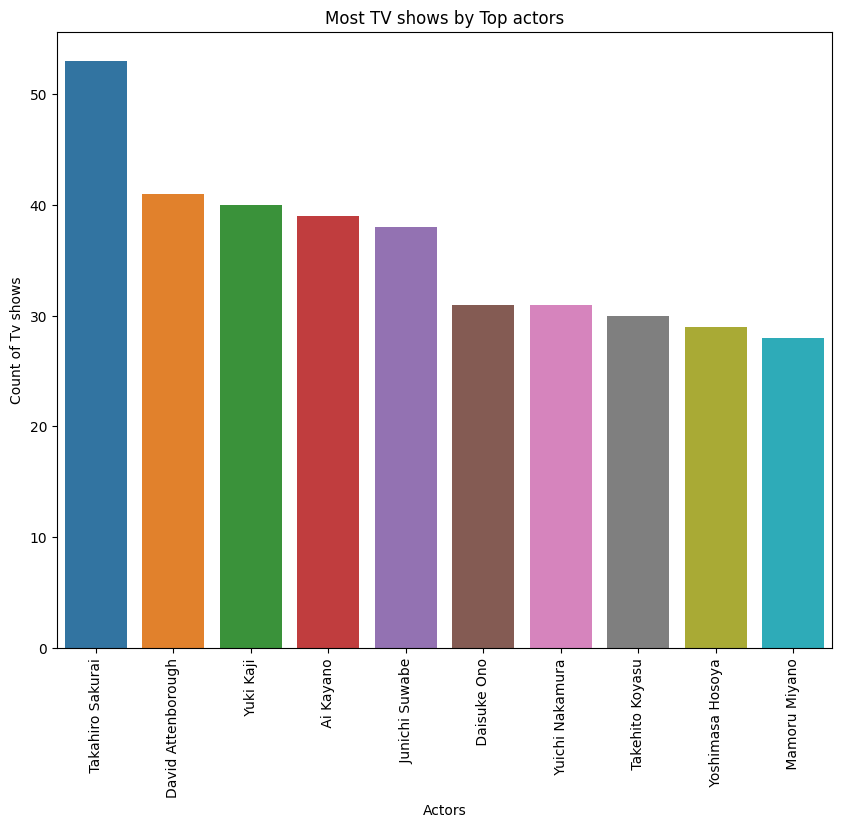

In [69]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_actor_Tv_show.index,y=top_10_actor_Tv_show.values,order=top_10_actor_Tv_show.index)
plt.xlabel('Actors')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Top actors')
plt.xticks(rotation=90)
plt.show()

## Top 10 directors who have appeared in most movies

In [70]:
top_10_director_movie=df[(df['type']=='Movie')&(df['director']!='unknown director')].groupby('director')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_director_movie

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: title, dtype: int64

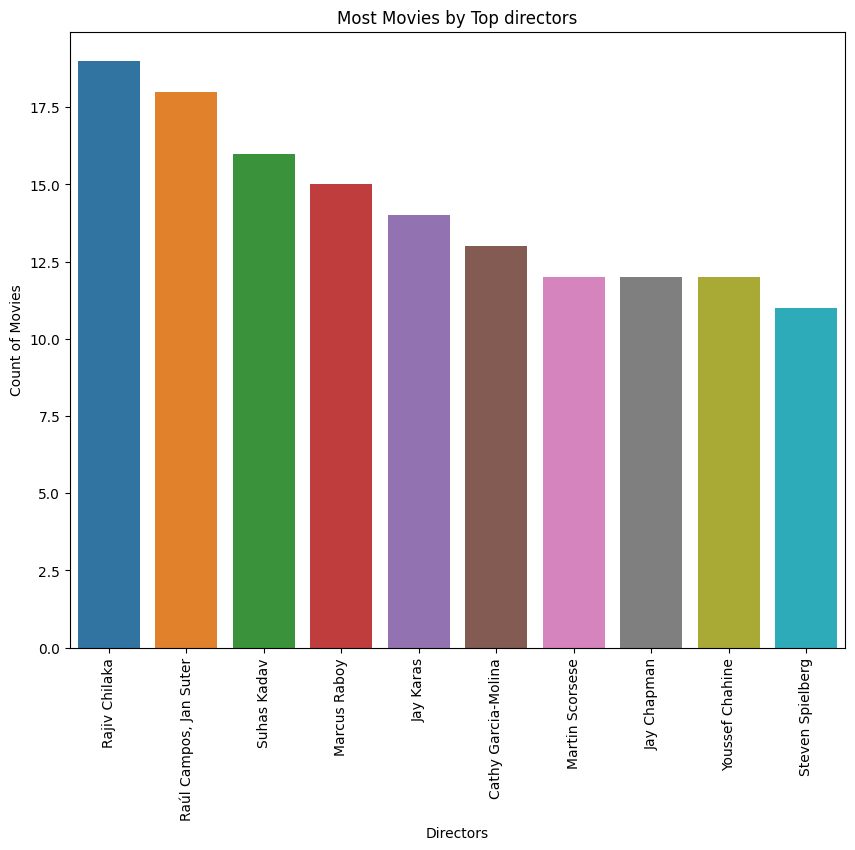

In [71]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_director_movie.index,y=top_10_director_movie.values,order=top_10_director_movie.index)
plt.xlabel('Directors')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Top directors')
plt.xticks(rotation=90)
plt.show()

## Top 10 directors who have appeared in most TV shows

In [72]:
top_10_director_Tv_show=df[(df['type']=='TV Show')&(df['director']!='unknown director')].groupby('director')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_director_Tv_show

director
Alastair Fothergill                                                      3
Stan Lathan                                                              2
Iginio Straffi                                                           2
Rob Seidenglanz                                                          2
Ken Burns                                                                2
Shin Won-ho                                                              2
Hsu Fu-chun                                                              2
Miguel Conde                                                             1
Mike Flanagan                                                            1
Norm Hiscock, Gary Howsam, Mike Smith, John Paul Tremblay, Robb Wells    1
Name: title, dtype: int64

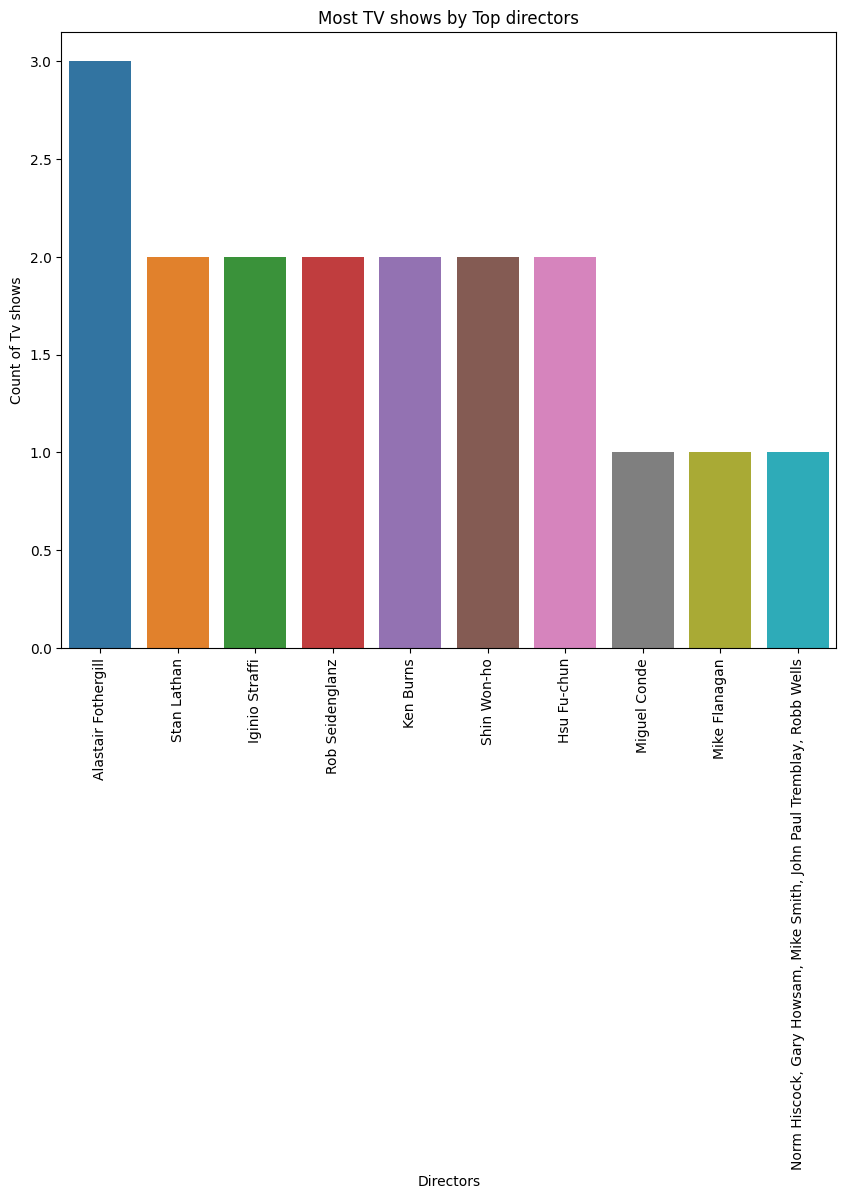

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_director_Tv_show.index,y=top_10_director_Tv_show.values,order=top_10_director_Tv_show.index)
plt.xlabel('Directors')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Top directors')
plt.xticks(rotation=90)
plt.show()

# Top genre movies which are more popular or produced more

In [74]:
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[unknown cast],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [75]:
df_unnested[df_unnested['type']=='Movie']['listed_in'].value_counts()


 International Movies        2624
Dramas                       1599
Comedies                     1210
Action & Adventure            859
Documentaries                 829
 Dramas                       827
 Independent Movies           736
 Romantic Movies              613
Children & Family Movies      605
 Thrillers                    512
 Comedies                     464
 Music & Musicals             357
Stand-Up Comedy               334
Horror Movies                 275
 Sci-Fi & Fantasy             230
 Sports Movies                218
International Movies          128
 LGBTQ Movies                 101
 Horror Movies                 82
Classic Movies                 80
 Faith & Spirituality          65
Thrillers                      65
 Cult Movies                   59
Movies                         53
 Anime Features                50
 Documentaries                 40
 Children & Family Movies      36
 Classic Movies                36
Anime Features                 21
Independent Mo

In [76]:
top_10_movie_genres=df_unnested[df_unnested['type']=='Movie']['listed_in'].value_counts().iloc[:10]

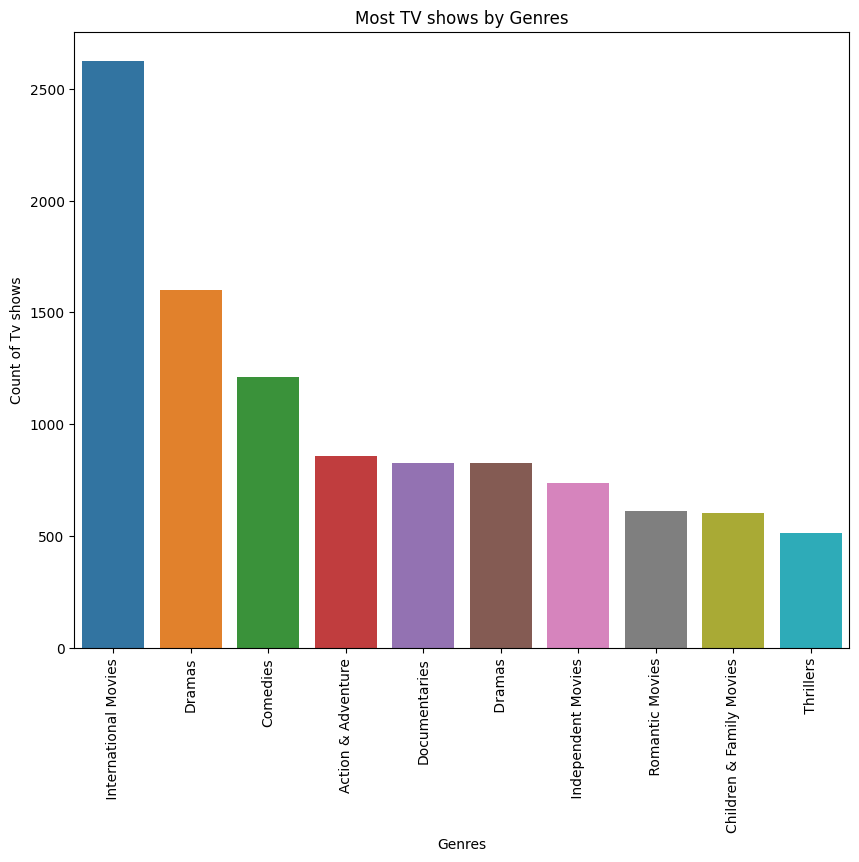

In [77]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_movie_genres.index,y=top_10_movie_genres.values,order=top_10_movie_genres.index)
plt.xlabel('Genres')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Genres')
plt.xticks(rotation=90)
plt.show()

#Text preprocessing for Generating Word cloud for movies

In [78]:
df_movie_genres=df_unnested[df_unnested['type']=='Movie']
# Concatenate all genres into a single string
all_genres = ' '.join(df_movie_genres['listed_in'].apply(lambda x: x.replace(',', ' ')))
all_genres

'Documentaries Children & Family Movies Dramas  Independent Movies  International Movies Comedies  Dramas Dramas  International Movies Children & Family Movies  Comedies Documentaries  International Movies Thrillers Comedies  International Movies Children & Family Movies Comedies  International Movies  Romantic Movies Comedies  International Movies  Music & Musicals Comedies Horror Movies  Sci-Fi & Fantasy Thrillers Dramas  Independent Movies  International Movies Dramas  International Movies  Thrillers Action & Adventure  Dramas  International Movies Action & Adventure  Dramas Action & Adventure  Classic Movies  Dramas Dramas  Horror Movies  Thrillers Action & Adventure  Horror Movies  Thrillers Action & Adventure  Horror Movies  Thrillers Documentaries Action & Adventure Dramas  Thrillers Action & Adventure  Anime Features  International Movies Action & Adventure  Anime Features  International Movies Action & Adventure  Anime Features  International Movies Action & Adventure  Anime F

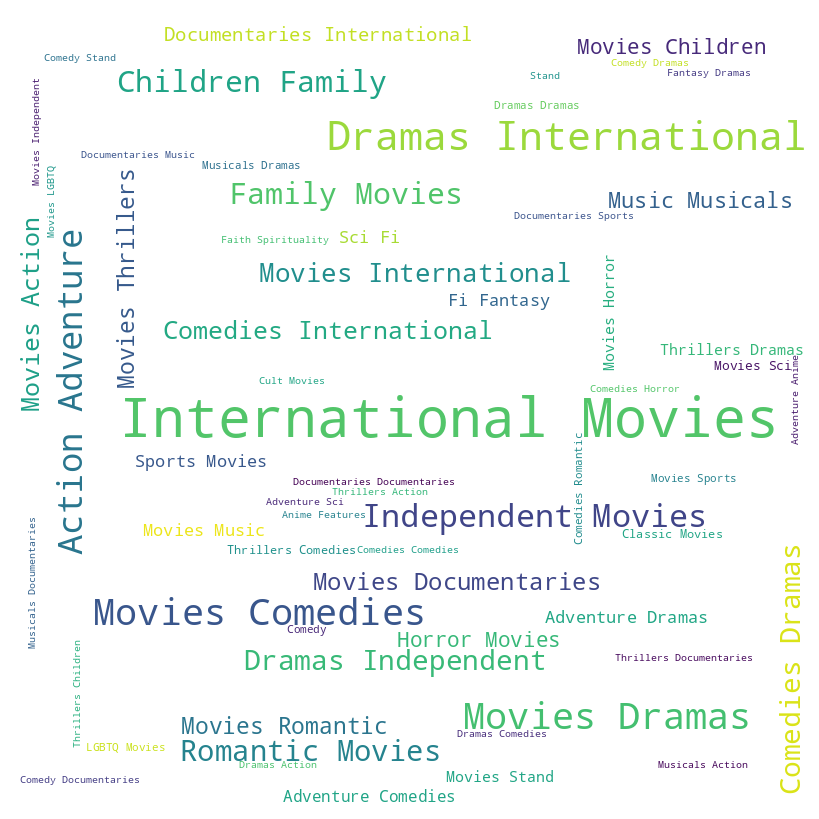

In [79]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_genres)

# Display the word cloud using matplotlib
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#Text preprocessing for Generating Word cloud for TV Shows


In [80]:
df_tv_show_genres=df_unnested[df_unnested['type']=='TV Show']
# Concatenate all genres into a single string
all_genres_tv_show = ' '.join(df_tv_show_genres['listed_in'].apply(lambda x: x.replace(',', ' ')))


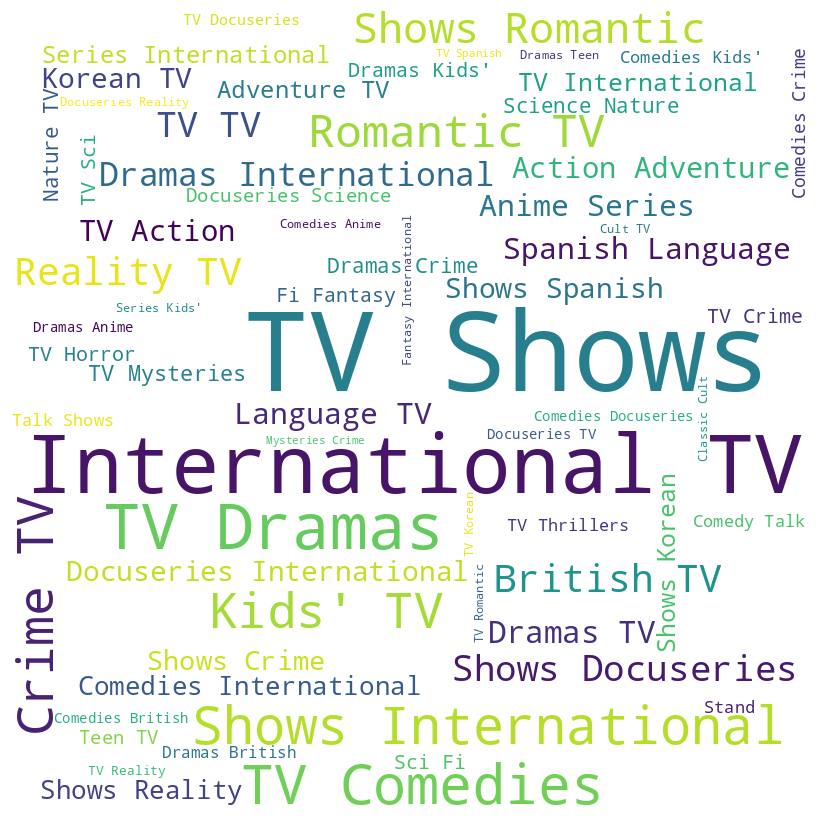

In [81]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_genres_tv_show)

# Display the word cloud using matplotlib
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [82]:
top_10_tv_show_genres=df_unnested[df_unnested['type']=='TV Show']['listed_in'].value_counts().iloc[:10]

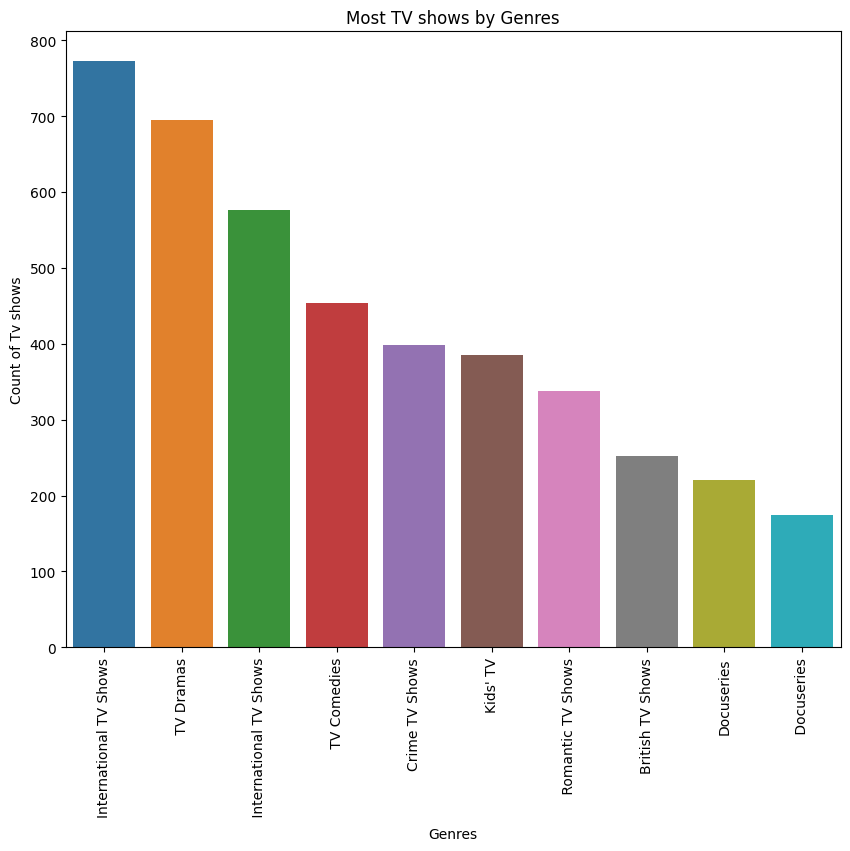

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_tv_show_genres.index,y=top_10_tv_show_genres.values,order=top_10_tv_show_genres.index)
plt.xlabel('Genres')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Genres')
plt.xticks(rotation=90)
plt.show()